In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
here = os.getcwd()
script_path = os.path.join(here, '..', '..', 'scripts')
import sys
sys.path.append(script_path)
from neutron_mesh_tally import *
from gamma_source_mesh import *


In [3]:
# neutron mesh tally

In [4]:
title_list = ['ORCS', 'Shift']
obj_list = [neutron_mesh_tally_data(os.path.join(here, 'orcs', 'merged_meshtal.h5'), which='orcs'),
            neutron_mesh_tally_data(os.path.join(here, 'shift_pyne', 'neutron_transport.out.h5'), which='shift')]


Finished reading ORCS file ./orcs/merged_meshtal.h5.
Finished reading Shift file ./shift_pyne/neutron_transport.out.h5.


/Users/4ib/Desktop/git/r2s_standards/problems/iter_sddr_benchmark/../../scripts/neutron_mesh_tally.py:79: RuntimeWarning: invalid value encountered in true_divide
  self.re = np.sqrt(np.array(f['binned'])[:,:,:,:,0,1]) / self.arr


In [5]:
max_val = max([max(q.arr.flatten()) for q in obj_list])
min_val = min([min(q.arr.flatten()[q.arr.flatten()!=0]) for q in obj_list])

In [6]:
import matplotlib.patches as patches
def get_outlines(short=True):
     style_dict = {'linestyle': '-', 'linewidth': 1, 'edgecolor': 'r', 'facecolor': 'none'}
     l = [patches.Rectangle((-50, 0), 100, 210,**style_dict), # 
         patches.Rectangle((-48, 0), 96, 210, **style_dict), # 
         patches.Rectangle((-50, 210), 100, 325, **style_dict),
         patches.Rectangle((-7.5, 0), 15, 210, **style_dict),
         patches.Rectangle((-50, 0), 100, 305+275-30, **style_dict)]
     if not short:
         more = [patches.Rectangle((-48, 535), 96, 15, **style_dict),
                 patches.Rectangle((-50, 535), 100, 15, **style_dict),
                 patches.Rectangle((-100, -110), 200, 10, **style_dict), # source disk
                 patches.Rectangle((-100, -100), 200, 100,**style_dict), # postsource_gap
                ]
         l.extend(more)
         for r in [15, 30, 45, 60, 100]:
             l.append(patches.Rectangle((-1*r, 580), r*2, 10, **style_dict))
     return l
         

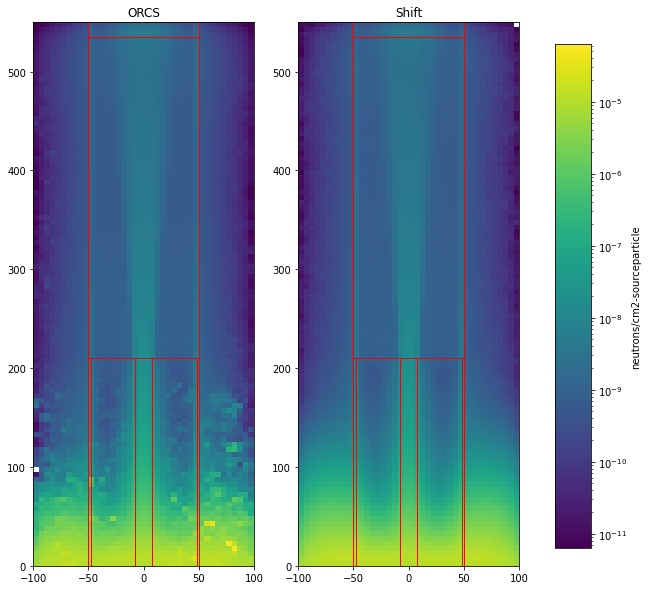

In [8]:
import matplotlib
fig, axes = plt.subplots(1,2, figsize=(10,10), sharex=True)
normie = matplotlib.colors.LogNorm(vmin=max_val*1e-7, vmax=max_val)
mat_list = []
for indx, val in enumerate(obj_list):
    x = val.meta_dict['mesh_x']
    y = val.meta_dict['mesh_z']
    half_indx = int(val.arr.shape[2]/2)
    mat = np.sum(val.arr, axis=0)[:, half_indx, :]
    mat_list.append(mat)
    sc = axes[indx].pcolormesh(x, y, mat, norm=normie)#, vmin=min_val, vmax=max_val)
    axes[indx].set_title(title_list[indx])
    for i in get_outlines():
        axes[indx].add_patch(i)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(sc, cax=cbar_ax, label='neutrons/cm2-sourceparticle')
plt.savefig('./imgs/neutron_flux.pdf', bbox_inches='tight')

In [9]:
obj_list[0].meta_dict['mesh_y'][half_indx]

0.0

/Users/4ib/anaconda3/envs/new/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


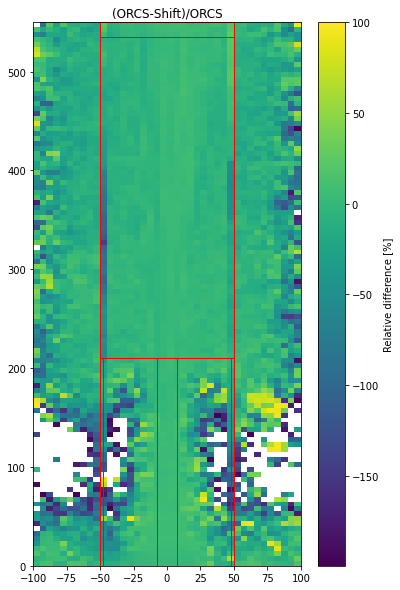

In [10]:
# relative diff
diff = (mat_list[0]-mat_list[1])/mat_list[0] * 100
# kill outlier
diff = np.nan_to_num(diff, nan=0, posinf=0, neginf=0)
new = np.where(np.abs(diff) > 2e2, np.nan, diff)


fig, ax = plt.subplots(1,1, figsize=(6,10))
sc = ax.pcolormesh(x,y, new)
fig.colorbar(sc, label='Relative difference [%]')
ax.set_title('(ORCS-Shift)/ORCS')
for i in get_outlines():
    ax.add_patch(i)

plt.savefig('./imgs/neutron_rel_diff.pdf', bbox_inches='tight')

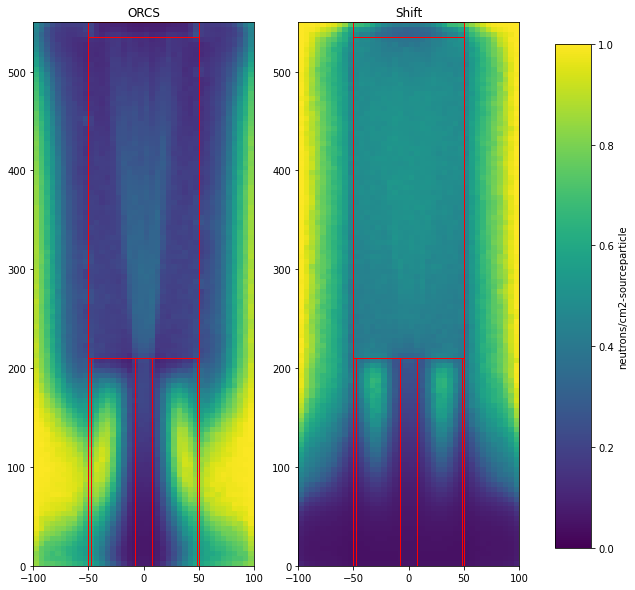

In [11]:
import matplotlib
fig, axes = plt.subplots(1,2, figsize=(10,10), sharex=True)
for indx, val in enumerate(obj_list):
    x = val.meta_dict['mesh_x']
    y = val.meta_dict['mesh_z']
    half_indx = int(val.arr.shape[2]/2)
    re = np.nan_to_num(val.re, nan=1.0)
    mat = np.mean(re, axis=0)[:, half_indx, :]

    sc = axes[indx].pcolormesh(x, y, mat, vmin=0, vmax=1)
    axes[indx].set_title(title_list[indx])
    for i in get_outlines():
        axes[indx].add_patch(i)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(sc, cax=cbar_ax, label='neutrons/cm2-sourceparticle')
plt.savefig('./imgs/neutron_rel_err.pdf', bbox_inches='tight')

In [12]:
# gamma forward

In [14]:
obj_list = [gamma_source_mesh_data(os.path.join(here, 'orcs', 'msx_sources'), which='orcs'),
            gamma_source_mesh_data(os.path.join(here, 'shift_pyne', 'shift_gamma_source.h5'), which='shift')]



53
Finished reading ORCS file from ./orcs/msx_sources.
Finished reading Shift HDF5 file from ./shift_pyne/shift_gamma_source.h5.


In [15]:
max_val = max([max(q.arr.flatten()) for q in obj_list])
min_val = min([min(q.arr.flatten()[q.arr.flatten()!=0]) for q in obj_list])

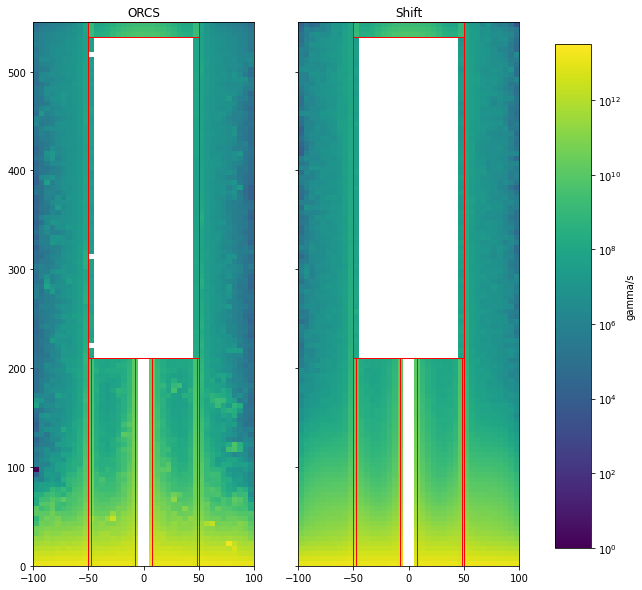

In [16]:
import matplotlib
fig, axes = plt.subplots(1,2, figsize=(10,10), sharey=True)
normie = matplotlib.colors.LogNorm(vmin=1e-0, vmax=max_val)
mat_list = []
for indx, val in enumerate(obj_list):
    x = val.meta_dict['mesh_x']
    y = val.meta_dict['mesh_z']
    half_indx = int(val.arr.shape[2]/2)
    if indx == 1:
        y = y[22:-8]
        mat = np.sum(val.arr, axis=0)[22:-8, half_indx, :]
    else:       
        mat = np.sum(val.arr, axis=0)[:, half_indx, :]
    mat_list.append(mat)
    sc = axes[indx].pcolormesh(x, y, mat, norm=normie)
    axes[indx].set_title(title_list[indx])
    for i in get_outlines():
        axes[indx].add_patch(i)
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(sc, cax=cbar_ax, label='gamma/s')
plt.savefig('./imgs/gamma_source.pdf', bbox_inches='tight')

/Users/4ib/anaconda3/envs/new/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/4ib/anaconda3/envs/new/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


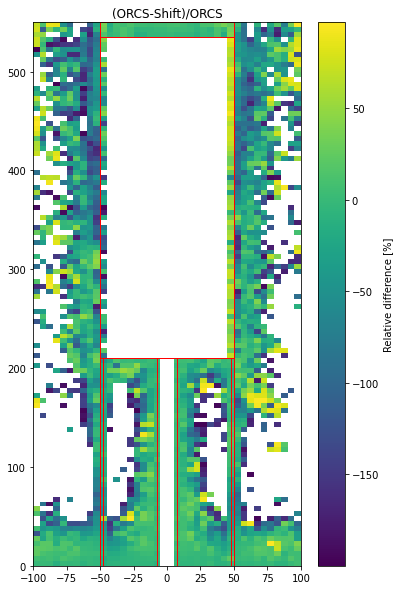

In [17]:
# relative diff
diff = (mat_list[0]-mat_list[1])/mat_list[0] * 100
# kill outlier
# diff = np.nan_to_num(diff, nan=0, posinf=0, neginf=0)
new = np.where(np.abs(diff) > 2e2, np.nan, diff)


fig, ax = plt.subplots(1,1, figsize=(6,10))
sc = ax.pcolormesh(x,y, new)
fig.colorbar(sc, label='Relative difference [%]')
ax.set_title('(ORCS-Shift)/ORCS')
for i in get_outlines():
    ax.add_patch(i)

plt.savefig('./imgs/gamma_rel_diff.pdf', bbox_inches='tight')